### testing on typos correction Models
first of all there are several python liberary that can deal with spell typos, most of them based on [Peter Norvig](http://norvig.com/spell-correct.html) techiguqe and some imporvments in each impelementation we will tests some of this liberaries on our data

Our [testset](https://drive.google.com/drive/folders/19HLVm8DMZy2okMVukC6743hOTJSyUpYE) collected from diffirent sources ([Kaggle](https://www.kaggle.com/steubk/fixing-typos/) - [autocorrect testset](https://github.com/fsondej/autocorrect) - [testset by Norvig](https://norvig.com/spell-testset1.txt)) 

we will use it to test (accuracy&speed) of each liberary.


In [2]:

import contractions
import pandas as pd
import re
from collections import Counter
import time
import string
import pkg_resources
from symspellpy import SymSpell, Verbosity

In [2]:
#Orgiginal Correction
def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [3]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# display suggestion term, term frequency, and edit distance
suggestions = sym_spell.lookup("crona", Verbosity.CLOSEST,
                               max_edit_distance=2,ignore_token  = None)
print(suggestions[0])

corona, 1, 2806095


In [4]:
from spellchecker import SpellChecker

spell = SpellChecker()  # loads default word frequency list

In [5]:
def contain_digits(s):
    contains_digit = False

    for character in s:
        if character.isdigit():
            contains_digit = True

    return contains_digit

### here my custom testing function 

In [7]:
test_set = []
with open("fulltest.txt") as f:
    for line in f:
        test_set.append((line.split(":")[0],line.split(":")[1][:-1]))
       
        
        
def spelltest(s,verbose=3):
    import time
    n, bad = 0, 0 
    start = time.process_time()

    for target, incorrect_spellings in test_set:
        for incorrect_spelling in incorrect_spellings.split("|"):
            
            n += 1
          
            if(s=="org"): #orginal without edit by Norivg
                    w = correction(incorrect_spelling)
            elif(s=="pcs"): #pycheckerspell
                    w = spell.correction(incorrect_spelling)
            else: #sympellpy
                    suggestions = sym_spell.lookup(incorrect_spelling, Verbosity.CLOSEST,
                                       max_edit_distance=2)

                    if len(suggestions)<=0 or contain_digits(incorrect_spelling):
                        w = incorrect_spelling
      
                    else:
                        w = str(suggestions[0]).split(',')[0]


            #w = spell.correction(incorrect_spelling)
            if w != target:
                bad += 1

        
    dt = time.process_time() - start
    print('{:.0%} of {} correct ({:.0%} unknown) at {:.0f} words per second '
          .format((n-bad)/ n, n, bad / n, n / dt))
    
    return bad

spelltest("pcs") # Development set
spelltest("org")
spelltest("at")

78% of 10177 correct (22% unknown) at 83 words per second 
65% of 10177 correct (35% unknown) at 86 words per second 
80% of 10177 correct (20% unknown) at 16284 words per second 


2016

In [25]:
ques = pd.read_pickle("./Que.pkl")
ques.head()

,Title,Body,Text,Code
0,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,I am using the Photoshop's javascript API to f...,[]
1,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,I have a cross-platform (Python) application w...,[]
2,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,I'm starting work on a hobby project with a py...,[]
3,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,There are several ways to iterate over a resul...,[]
4,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,I don't remember whether I was dreaming or not...,"[foo in iter_attr(array of python objects, att..."


In [26]:
noise = '!"$%&\'()*+,-./:;?@[\\]^_`{|}~\n<=>'

In [27]:
def clean(text):
    text = re.sub(r"\'", "'", text) # match all literal apostrophe pattern then replace them by a single whitespace
    text = re.sub(r"\n", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r"\xa0", " ", text) # match all literal non-breakable space pattern then replace them by a single whitespace
    text = re.sub('\s+', ' ', text) # match all one or more whitespace then replace them by a single whitespace
    text = text.strip(' ')
    return text

In [8]:
ques['Text'][11]

NameError: name 'ques' is not defined

In [30]:
ques['Text'] = ques['Text'].apply(lambda x: clean(x))
ques['Title'] = ques['Title'].apply(lambda x: clean(x))

In [31]:
ques['Text'][11]

"I've got a menu in Python. That part was easy. I'm using to get the selection from the user. The problem is that (and input) require the user to press Enter after they make a selection. Is there any way to make the program act immediately upon a keystroke? Here's what I've got so far: It would be great to have something like"

In [32]:
ques['Text'] = ques['Text'].apply(lambda x: contractions.fix(x))
ques['Title'] = ques['Title'].apply(lambda x: contractions.fix(x))

In [33]:
ques['Text'][11]

'I have got a menu in Python. That part was easy. I am using to get the selection from the user. The problem is that (and input) require the user to press Enter after they make a selection. Is there any way to make the program act immediately upon a keystroke? here is what I have got so far: It would be great to have something like'

In [34]:
for i in noise:
    ques['Text'] = ques['Text'].str.replace(i,' ')
    ques['Title'] = ques['Title'].str.replace(i,' ')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


/home/mohamd/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mohamd/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [35]:
ques['Text'][11]

'I have got a menu in Python  That part was easy  I am using to get the selection from the user  The problem is that  and input  require the user to press Enter after they make a selection  Is there any way to make the program act immediately upon a keystroke  here is what I have got so far  It would be great to have something like'

In [36]:
ques['Text'] = ques['Text'].apply(lambda x: clean(x))
ques['Title'] = ques['Title'].apply(lambda x: clean(x))

In [37]:
ques['Text'][11]

'I have got a menu in Python That part was easy I am using to get the selection from the user The problem is that and input require the user to press Enter after they make a selection Is there any way to make the program act immediately upon a keystroke here is what I have got so far It would be great to have something like'

In [163]:
corpus = [] #corpus of ['text','Title'] 
for i in range(len(ques)):
    [corpus.append(word)for word in ques['Text'][i].split(' ')]
    [corpus.append(word)for word in ques['Title'][i].split(' ')]

In [39]:
unique_words = set(corpus)

In [40]:
print(f"all words in text = {len(corpus)}")
print(f"unique words in text = {len(unique_words)}")

all words in text = 63956411
unique words in text = 403702


In [41]:
corrected_words = {}
n, bad = 0, 0 
start = time.process_time()

for word in unique_words:
    
        n += 1 


        
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST,
                           max_edit_distance=1)   
    
        if len(suggestions)<=0 or contain_digits(word):
            w = word

        else:
            w = str(suggestions[0]).split(',')[0]


        #w = spell.correction(incorrect_spelling)
        if w != word:
            bad +=1
            
        corrected_words[word] = w

dt = time.process_time() - start
print('{:.0%} of {} correct ({:.0%} unknown) at {:.0f} words per second '
      .format((n-bad)/ n, n, bad / n, n / dt))


/home/mohamd/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


81% of 403702 correct (19% unknown) at 50429 words per second 


/home/mohamd/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [42]:
len(corrected_words)

403702

In [43]:
term_frequncy = {}

for i in corpus:
    term_frequncy.setdefault(i, 0)
    term_frequncy[i] += 1

In [167]:
print(corpus.count('hello')) #test
print(term_frequncy['hello'])  

3315
3285


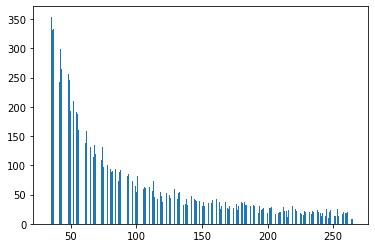

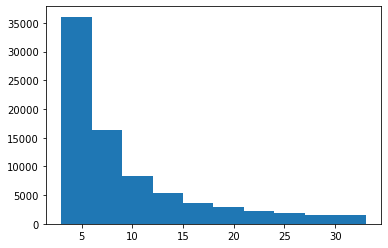

1

In [134]:
import matplotlib.pyplot as plt
import numpy as np

keys = term_frequncy.keys()
values = term_frequncy.values()
values = list(values)
values.sort()
plt.hist(values[380000:396000], bins=500) 
plt.show()
plt.hist(values[300000:380000], bins=10) 
plt.show()
list(values)[0]

In [145]:
count = list(term_frequncy.values())
words = list(term_frequncy.keys())
print(term_frequncy["hell"])

430


In [172]:
print(corpus.count('helo')) #test
print(term_frequncy['helo']) 
print('--------------------------')
print(corpus.count('references')) #test
print(term_frequncy['references'])  
print('--------------------------')
print(corpus.count('wxpython')) #test
print(term_frequncy['wxpython'])  

0
8
--------------------------
3023
3010
--------------------------
1753
1753


In [164]:
ie = 0
for i in range(len(corpus)): 
    if term_frequncy[corpus[i]]<50:
        corpus[i] = corrected_words[corpus[i]]

In [173]:
s = open("mycorp.txt", "a")
oo = 0
for i in corpus:
    if i.isalnum():
        s.write(i+" ")
        oo+=1

s.close()
print(oo)

63900776


In [156]:
o=0
eng = 0
links = 0
fake_mails = 0
noise = 0
m = 0
eng_nums = 0
weird = 0

charac = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789 \n'
for word in u_d:
    
    flag = 0
    for i in clear:
        if i in word:
            m += 1
            flag = 1
            break
            
        
    if word.isalpha():
        eng += 1
    elif not flag:
        weird += 1
        
    if word.isalnum():
        eng_nums += 1
        
    if word.count('/')>1 or word.count("\\")>1:
        links += 1
        
    if '@' in word and '.com' in word or word.startswith('@') :
        fake_mails += 1
        
    if '@' in word and '.com' not in word and not word.startswith('@') or '�' in word :
        noise += 1

        
    o+=1
print(o)
print(f"clean English {int(eng/o * 100)}%")
print(f"English with numbers {int((eng_nums-eng)/o * 100)}%")
print(f"links {int(links/o * 100)}%")
print(f"fake_mails {round(fake_mails/o *100,2)}%")
print(f"compeletly noise {round(noise/o * 100,2)}%")
print(f"-----------------\nwords with noise {int(m/o *100)}%")
print("==> plain text with only '(' or ')' 12%")
print("==> plain text with only '!' 1%")
print("==> plain text with only '?' 3%")
print("==> plain text with '!' and '.' is 20%")

1233699
clean English 11%
English with numbers 2%
links 7%
fake_mails 0.36%
compeletly noise 0.16%
52095
-----------------
words with noise 84%
==> plain text with only '(' or ')' 12%
==> plain text with only '!' 1%
==> plain text with only '?' 3%
==> plain text with '!' and '.' is 20%


In [3]:
test_set = []
with open("fulltest.txt") as f:
    for line in f:
        test_set.append((line.split(":")[0],line.split(":")[1][:-1]))

In [4]:
len(test_set)

10108

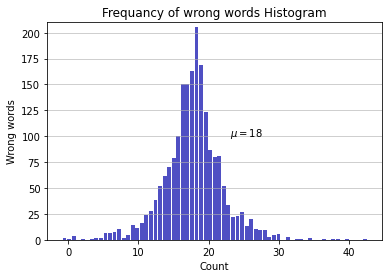

In [52]:
# An "interface" to matplotlib.axes.Axes.hist() method
import matplotlib.pyplot as plt
d = np.random.laplace(loc=18, scale=3, size=2000)
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Count')
plt.ylabel('Wrong words')
plt.title('Frequancy of wrong words Histogram')
plt.text(23, 100, r'$\mu=18$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('myimage.svg', format='svg', dpi=1200)